Burlington Data Scientists Meetup
=======
Working Session: Intro to Python, Basic Data Frames and Visualization
-----------
April 3, 2017 

This will be a beginner class to help you get started on using Python for data analysis. Using a Jupyter Notebook (formally iPython Notebook) we will import a csv file from Burlington Open Data (https://data.burlingtonvt.gov/), explore the date frames with Pandas, and create basic visualizations with Matplotlib and Seaborn.

In [1]:
%matplotlib inline

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib 
#import matplotlib.pyplot as plt
#import matplotlib.pylab as pylab
#import seaborn as sns

In [2]:
print("Welcome to the Burlington Data Scientist Meetup")

Welcome to the Burlington Data Scientist Meetup


Load the CSV File
------------

In [7]:
wholedf = pd.read_csv('Police_Incident_Log.csv')
#wholedf = pd.read_csv('~/Desktop/Meetup/Police_Incident_Log.csv')
#wholedf = pd.read_csv('C:/Users/kefor/Desktop/Meetup/Police_Incident_Log.csv')

NameError: name 'pd' is not defined

Explore Dataframe Contents
-------------

In [4]:
# Lists the first lines in a dataframe
wholedf.head(10)

Incident Id             Call Type                    Date  \
0          576  Domestic Disturbance  10/01/2011 07:10:00 PM   
1          584               Traffic  10/01/2011 08:58:00 PM   
2          586          Intoxication  10/01/2011 09:13:00 PM   
3          587                 Noise  10/01/2011 09:25:00 PM   
4          591                 Noise  10/01/2011 10:03:00 PM   
5          592               Traffic  10/01/2011 10:32:00 PM   
6          595          Intoxication  10/01/2011 10:53:00 PM   
7          599               Traffic  10/01/2011 11:40:00 PM   
8          602                 Noise  10/02/2011 12:02:00 AM   
9          603      Assault - Simple  10/02/2011 12:10:00 AM   

                  Location Incident Number  
0                  Park St      11BU023135  
1   S Winooski Ave/Bank St      11BU023143  
2                 Pearl St      11BU023145  
3            No Willard St      11BU023146  
4                  Peru St      11BU023150  
5        Pine St/Locust St      11BU023151  
6           Colchester Ave      11BU023154  
7   S Winooski Ave/Bank St      11BU023158  
8  North St/N Winooski Ave      11BU023161  
9              Converse Ct      11BU023162

In [5]:
# Lists the last rows in a dataframe
wholedf.tail(10)

Incident Id                    Call Type                    Date  \
28823       159162               Stolen Vehicle  09/18/2013 12:50:00 PM   
28824       160945                     Trespass  09/21/2013 01:59:00 PM   
28825       161280                        Noise  09/22/2013 04:09:00 AM   
28826       164261                        Noise  09/27/2013 10:58:00 PM   
28827       165840                    Vandalism  10/01/2013 08:44:00 AM   
28828       169204         Domestic Disturbance  10/07/2013 03:26:00 PM   
28829       173283  Ordinance Violation - Other  10/15/2013 05:14:00 PM   
28830       177985                        Noise  10/25/2013 01:40:00 AM   
28831       180001      Larceny - from Building  10/29/2013 02:08:00 PM   
28832       186525      Larceny - from Building  11/12/2013 02:35:00 PM   

                        Location Incident Number  
28823             S Winooski Ave      13BU025009  
28824                   Pearl St      13BU025379  
28825                 S Union St      13BU025467  
28826  S Union St/Kingsland Terr      13BU026061  
28827               Lakeside Ave      13BU026395  
28828          Church St/King St      13BU027107  
28829               Shelburne Rd      13BU027957  
28830                 College St      13BU028878  
28831                 N Union St      13BU029253  
28832             N Winooski Ave      13BU030503

In [6]:
# List out all the column names 
list(wholedf)

['Incident Id', 'Call Type', 'Date', 'Location', 'Incident Number']

In [7]:
# Lists summary info of datafram including count of non-null elements, data type, memory useage and range index
wholedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28833 entries, 0 to 28832
Data columns (total 5 columns):
Incident Id        28833 non-null int64
Call Type          28833 non-null object
Date               28833 non-null object
Location           28813 non-null object
Incident Number    28833 non-null object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [8]:
# Tells you how many rows and columns in a dataframe
wholedf.shape
#len(wholedf.index)

(28833, 5)

In [9]:
# Returns an array of unique values 
pd.unique(wholedf.Location)

array(['Park St', 'S Winooski Ave/Bank St', 'Pearl St', ...,
       'Summer St/Front St', 'Intervale', 'Pine Pl/St Paul St'], dtype=object)

Understanding the Numbers
--------------

In [10]:
# Returns a count of not null elements in each column (much like df.info)
wholedf.count()

# Returns a list of numerical columns with total sum
wholedf.sum()

# Returns a list of numerical columns with standard deviation
wholedf.std()

# Returns a list of numerical columns with mean
wholedf.mean()

# Returns a list of numerical columns with median
wholedf.median()

# Returns the min for any float or int64
wholedf.min()

# Returns the max for any float or int64
wholedf.max()

# Mathmatical description and statistics of all numerical columns
wholedf.describe()


Incident Id        28833
Call Type          28833
Date               28833
Location           28813
Incident Number    28833
dtype: int64

Finding Missing Values
----------

In [11]:
test = wholedf.isnull()
test.head(5)

Incident Id Call Type   Date Location Incident Number
0       False     False  False    False           False
1       False     False  False    False           False
2       False     False  False    False           False
3       False     False  False    False           False
4       False     False  False    False           False

In [12]:
# Adds up all the times a value is null or missing
wholedf.isnull().sum()

Incident Id         0
Call Type           0
Date                0
Location           20
Incident Number     0
dtype: int64

In [13]:
# Adds up all the not null values
wholedf.notnull().sum()

Incident Id        28833
Call Type          28833
Date               28833
Location           28813
Incident Number    28833
dtype: int64

In [14]:
# Replace missing values with a text of "Main St"
wholedf["Location"] = wholedf["Location"].fillna("Main St")

# Replace missing values with a median, or a mean.
#wholedf["Location"] = wholedf["Location"].fillna(wholedf["Location"].median(), inplace=True)

In [15]:
# Replaces that value in the whole dataframe
dfreplace = wholedf.replace("11BU023146","11BU024312414")
dfreplace.head(5)

Incident Id             Call Type                    Date  \
0          576  Domestic Disturbance  10/01/2011 07:10:00 PM   
1          584               Traffic  10/01/2011 08:58:00 PM   
2          586          Intoxication  10/01/2011 09:13:00 PM   
3          587                 Noise  10/01/2011 09:25:00 PM   
4          591                 Noise  10/01/2011 10:03:00 PM   

                 Location Incident Number  
0                 Park St      11BU023135  
1  S Winooski Ave/Bank St      11BU023143  
2                Pearl St      11BU023145  
3           No Willard St   11BU024312414  
4                 Peru St      11BU023150

In [16]:
# Replace based on conditional statements for another column
wholedf.loc[(wholedf['Incident Number'] == "11BU023143"), 'Street2'] = "Pine St"
wholedf.head(10)

Incident Id             Call Type                    Date  \
0          576  Domestic Disturbance  10/01/2011 07:10:00 PM   
1          584               Traffic  10/01/2011 08:58:00 PM   
2          586          Intoxication  10/01/2011 09:13:00 PM   
3          587                 Noise  10/01/2011 09:25:00 PM   
4          591                 Noise  10/01/2011 10:03:00 PM   
5          592               Traffic  10/01/2011 10:32:00 PM   
6          595          Intoxication  10/01/2011 10:53:00 PM   
7          599               Traffic  10/01/2011 11:40:00 PM   
8          602                 Noise  10/02/2011 12:02:00 AM   
9          603      Assault - Simple  10/02/2011 12:10:00 AM   

                  Location Incident Number  Street2  
0                  Park St      11BU023135      NaN  
1   S Winooski Ave/Bank St      11BU023143  Pine St  
2                 Pearl St      11BU023145      NaN  
3            No Willard St      11BU023146      NaN  
4                  Peru St      11BU023150      NaN  
5        Pine St/Locust St      11BU023151      NaN  
6           Colchester Ave      11BU023154      NaN  
7   S Winooski Ave/Bank St      11BU023158      NaN  
8  North St/N Winooski Ave      11BU023161      NaN  
9              Converse Ct      11BU023162      NaN

Value Counts
------------

In [17]:
wholedf['Call Type'].value_counts()

Traffic                        11747
Noise                           3422
Intoxication                    2640
Trespass                        2616
Ordinance Violation - Other     1768
Domestic Disturbance            1429
Mental Health Issue             1225
Vandalism                       1222
Burglary                         872
Larceny - from Building          854
Assault - Simple                 484
Stolen Vehicle                   154
Domestic Assault - Misd          118
Assault - Aggravated              82
Robbery                           67
Larceny from a Person             53
Airport AOA Violation             46
Alcohol Offense                   32
Inciting a Felony                  2
Name: Call Type, dtype: int64

Cutting Columns
----------

In [18]:
wholedf.head(2)

Incident Id             Call Type                    Date  \
0          576  Domestic Disturbance  10/01/2011 07:10:00 PM   
1          584               Traffic  10/01/2011 08:58:00 PM   

                 Location Incident Number  Street2  
0                 Park St      11BU023135      NaN  
1  S Winooski Ave/Bank St      11BU023143  Pine St

In [19]:
del wholedf['Incident Id']
wholedf.head(4)

Call Type                    Date                Location  \
0  Domestic Disturbance  10/01/2011 07:10:00 PM                 Park St   
1               Traffic  10/01/2011 08:58:00 PM  S Winooski Ave/Bank St   
2          Intoxication  10/01/2011 09:13:00 PM                Pearl St   
3                 Noise  10/01/2011 09:25:00 PM           No Willard St   

  Incident Number  Street2  
0      11BU023135      NaN  
1      11BU023143  Pine St  
2      11BU023145      NaN  
3      11BU023146      NaN

Dicing and Subseting
----------

In [20]:
# Returns first row through the specified number of rows, in this case 50
subdf = wholedf[:50]
subdf.shape

(50, 5)

In [21]:
# Returns from row 100 through to the end of the dataframe
subdf = wholedf[100:]
subdf.shape

(28733, 5)

In [22]:
# Returns a single column as an object array
tooshortdf = wholedf['Date']
tooshortdf.head(2)

0    10/01/2011 07:10:00 PM
1    10/01/2011 08:58:00 PM
Name: Date, dtype: object

In [23]:
# Returns several columns in a new data frame
shortdf = wholedf[['Date','Call Type']]
shortdf.head(2)

Date             Call Type
0  10/01/2011 07:10:00 PM  Domestic Disturbance
1  10/01/2011 08:58:00 PM               Traffic

In [24]:
# Cuts the dateframe down based a condition
shorterdf = wholedf[(wholedf['Location'] == "Park St")]
print(shorterdf.shape)
shorterdf.head(5)

(112, 5)


Call Type                    Date Location Incident Number  \
0    Domestic Disturbance  10/01/2011 07:10:00 PM  Park St      11BU023135   
186  Domestic Disturbance  10/08/2011 02:25:00 PM  Park St      11BU023690   
189  Domestic Disturbance  10/08/2011 02:36:00 PM  Park St      11BU023695   
672                 Noise  10/21/2011 10:40:00 PM  Park St      11BU024948   
682                 Noise  10/22/2011 01:39:00 AM  Park St      11BU024968   

    Street2  
0       NaN  
186     NaN  
189     NaN  
672     NaN  
682     NaN

In [25]:
# Cuts the dateframe down based multiple condition, this can be an AND & but it also can be OR which is |
shorterstilldf = wholedf[(wholedf['Location'] == "Park St") & (wholedf['Call Type'] == "Domestic Disturbance")]
print(shorterstilldf.shape)
shorterstilldf.head(5)

(16, 5)


Call Type                    Date Location Incident Number  \
0     Domestic Disturbance  10/01/2011 07:10:00 PM  Park St      11BU023135   
186   Domestic Disturbance  10/08/2011 02:25:00 PM  Park St      11BU023690   
189   Domestic Disturbance  10/08/2011 02:36:00 PM  Park St      11BU023695   
5958  Domestic Disturbance  03/24/2012 05:10:00 PM  Park St      12BU007124   
6405  Domestic Disturbance  04/05/2012 11:26:00 PM  Park St      12BU008127   

     Street2  
0        NaN  
186      NaN  
189      NaN  
5958     NaN  
6405     NaN

In [46]:
# Create a subset based on two variables and return the size
countdf = wholedf.groupby(['Call Type', 'Location']).size().reset_index(name="Count")
countdf.head(15)

Call Type            Location  Count
0   Airport AOA Violation             airport      1
1   Airport AOA Violation          airport dr     40
2   Airport AOA Violation        airport pkwy      1
3   Airport AOA Violation                biap      4
4         Alcohol Offense           bright st      3
5         Alcohol Offense            buell st      2
6         Alcohol Offense           cherry st      1
7         Alcohol Offense           church st      6
8         Alcohol Offense      colchester ave      1
9         Alcohol Offense           hickok pl      1
10        Alcohol Offense          johnson st      1
11        Alcohol Offense  king st ferry dock      1
12        Alcohol Offense             lake st      1
13        Alcohol Offense             main st      2
14        Alcohol Offense          n union st      1

Concatenating Together
-----------

In [26]:
# Create sets of data
calltype = wholedf[['Call Type','Date']]
location = wholedf['Location']


# join it back together with an inner join based on the index number
newdf = pd.concat([calltype,location], axis=1)
newdf.head(3)

Call Type                    Date                Location
0  Domestic Disturbance  10/01/2011 07:10:00 PM                 Park St
1               Traffic  10/01/2011 08:58:00 PM  S Winooski Ave/Bank St
2          Intoxication  10/01/2011 09:13:00 PM                Pearl St

Data Cleanup
---------

In [27]:
# make all location lower case
wholedf.Location = wholedf.Location.str.lower()

# Split it into two parts
wholedf['Location'], wholedf['Street2'] = wholedf['Location'].str.split('/', 1).str

# Remove trailing spaces from string
wholedf['Location'] = wholedf.Location.str.rstrip()
wholedf['Street2'] = wholedf.Street2.str.rstrip()

In [28]:
# Fix some of the spelling mistakes/differences
wholedf['Location'] = wholedf['Location'].str.replace("drive","dr")
wholedf['Location'] = wholedf['Location'].str.replace("road","rd")
wholedf['Location'] = wholedf['Location'].str.replace("rd.","rd")

Creating Summaries
----------

In [52]:
countviolationdf = wholedf[['Call Type', 'Date']].groupby(['Call Type'], as_index=False).count().sort_values(by='Date',ascending=0)
countviolationdf.columns = ['Type','Count']
countviolationdf['Total']= countviolationdf['Count'].sum()
countviolationdf['Percentage'] = countviolationdf['Count'] / countviolationdf['Total']
countviolationdf.head(15)

Type  Count  Total  Percentage
16                      Traffic  11747  28833    0.407415
12                        Noise   3422  28833    0.118683
8                  Intoxication   2640  28833    0.091562
17                     Trespass   2616  28833    0.090729
13  Ordinance Violation - Other   1768  28833    0.061319
6          Domestic Disturbance   1429  28833    0.049561
11          Mental Health Issue   1225  28833    0.042486
18                    Vandalism   1222  28833    0.042382
4                      Burglary    872  28833    0.030243
9       Larceny - from Building    854  28833    0.029619
3              Assault - Simple    484  28833    0.016786
15               Stolen Vehicle    154  28833    0.005341
5       Domestic Assault - Misd    118  28833    0.004093
2          Assault - Aggravated     82  28833    0.002844
14                      Robbery     67  28833    0.002324

Export to CSV
-----------

In [40]:
countviolationdf.to_csv('countviolation.csv', index = False)

Time Series
----------

In [31]:
# Convert Date to datetime value and Split date out into seperate date and time only
wholedf['Date'] = pd.to_datetime(wholedf['Date'])

# Split out a time series event
wholedf['timeonly'],wholedf['dateonly']= wholedf['Date'].apply(lambda x:x.time()), wholedf['Date'].apply(lambda x:x.date())
wholedf.head(5)

Call Type                Date        Location Incident Number  \
0  Domestic Disturbance 2011-10-01 19:10:00         park st      11BU023135   
1               Traffic 2011-10-01 20:58:00  s winooski ave      11BU023143   
2          Intoxication 2011-10-01 21:13:00        pearl st      11BU023145   
3                 Noise 2011-10-01 21:25:00    no willardst      11BU023146   
4                 Noise 2011-10-01 22:03:00         peru st      11BU023150   

   Street2  timeonly    dateonly  
0      NaN  19:10:00  2011-10-01  
1  bank st  20:58:00  2011-10-01  
2      NaN  21:13:00  2011-10-01  
3      NaN  21:25:00  2011-10-01  
4      NaN  22:03:00  2011-10-01

Data Visualization
----------

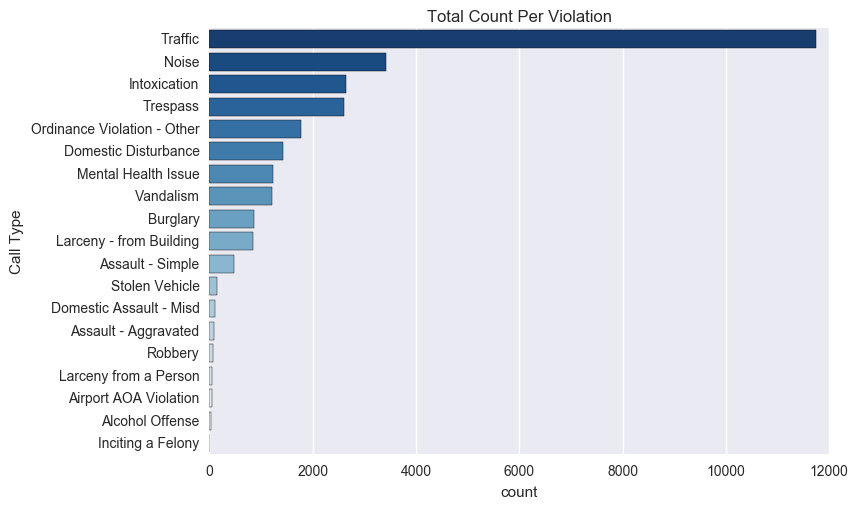

In [32]:
sns.countplot(y="Call Type", data=wholedf, order=countviolationdf['Type'], palette="Blues_r")
plt.title("Total Count Per Violation")
plt.show()

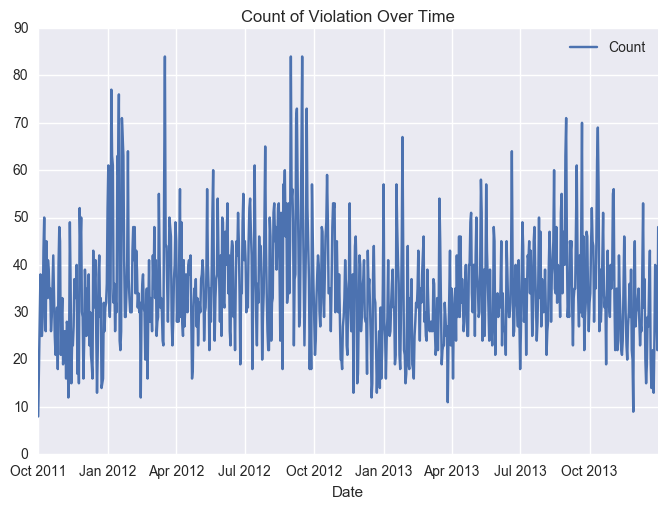

In [33]:
datedf = wholedf[['dateonly', 'Date']].groupby(['dateonly'], as_index=False).count().sort_values(by='dateonly',ascending=0)
datedf = datedf.set_index(datedf.dateonly)
del datedf['dateonly']
datedf.columns = ['Count']

#plot the result
datedf.plot()
plt.title('Count of Violation Over Time')
plt.xlabel('Date')
plt.show()

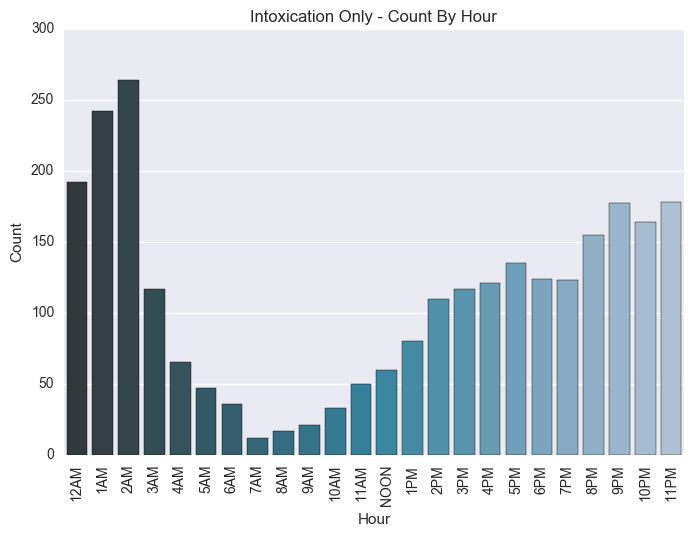

In [39]:
intoxdf = wholedf[(wholedf['Call Type'] == "Intoxication")]

hourdf = intoxdf[['timeonly']].groupby(intoxdf['Date'].dt.hour, as_index=False).count()
hourdf['Hour'] = ["12AM","1AM","2AM","3AM","4AM","5AM","6AM","7AM","8AM","9AM","10AM","11AM","NOON","1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM"]
hourdf.columns = ['Count','Hour']
hourdf

sns.barplot(x='Hour', y="Count", data=hourdf, palette="PuBuGn_d")
plt.title("Intoxication Only - Count By Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Bonus
-------
How to tell how effecient the various ways to do something actually is by timing it

In [34]:
%timeit [column for column in wholedf]

The slowest run took 21.81 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.97 µs per loop


In [35]:
%timeit wholedf.columns.values.tolist()

The slowest run took 14.62 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 892 ns per loop


In [36]:
% timeit list(wholedf.columns.values)

The slowest run took 11.04 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.72 µs per loop


In [37]:
%timeit list(wholedf)

The slowest run took 7.29 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.5 µs per loop
